In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
# drop Relevant? == 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]


approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

approximation_algorithms.sort_values(by=['Family Name', 'Variation', 'Year'], inplace=True)

approximation_algorithms


,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS)
148,All-Pairs Shortest Paths (APSP),1,1.0,"APSP, unweighted, undirected, no FMM (Approxim...","Aingworth, Chekuri, Indyk, Motwani",1999.0,5.50,99999.000,2.0,additive,no,NaN
149,All-Pairs Shortest Paths (APSP),1,1.0,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_2]",2000.0,5.33,99999.000,2.0,additive,no,NaN
150,All-Pairs Shortest Paths (APSP),1,1.0,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_k]",2000.0,5.01,99999.000,3.0,additive,yes,NaN
151,All-Pairs Shortest Paths (APSP),1,1.0,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_infty]",2000.0,5.01,4.000,99999.0,multiplicative,no,NaN
152,All-Pairs Shortest Paths (APSP),1,1.0,"APSP, unweighted, undirected, no FMM (Approxim...","Deng, Kirkpatrick, Rong, V. Williams, Zhong",2022.0,5.29,99999.000,2.0,additive,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
858,Transitive Reduction Problem,1,1.0,Minimum Equivalent Digraph,NaN,1996.0,7.00,2.618,99999.0,multiplicative,no,NaN
861,Transitive Reduction Problem,1,1.0,Minimum Equivalent Digraph,NaN,2009.0,7.00,2.500,99999.0,multiplicative,no,NaN
847,Wiener Index,1,1.0,Minimum Wiener Connector problem,NaN,2008.0,5.50,2.000,99999.0,multiplicative,yes,FPTAS
846,Wiener Index,1,1.0,Minimum Wiener Connector problem,Ruchansky,2015.0,5.01,4.000,99999.0,multiplicative,no,NaN


In [71]:
# read sheet1
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']



# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

# drop if Famiy Name is not in approximation_algorithms
sheet1 = sheet1[sheet1['Family Name'].isin(approximation_algorithms['Family Name'])]

sheet1



,Family Name,Looked at?,Variation,Algorithm Name,Year,Time Complexity Class,Approximate?,Parallel?
2,Optimal Binary Search Trees,2.0,Alphabetic Tree Problem,Klawe; Mumey,1993.0,3.0,0,0
8,The Subset-Sum Problem,2.0,Subset Sum,Pisinger,2003.0,3.0,0,0
9,The Subset-Sum Problem,2.0,Subset Sum,Faaland,1973.0,3.0,0,0
10,The Subset-Sum Problem,2.0,Subset Sum,Pferschy,1999.0,3.0,0,0
11,The Subset-Sum Problem,2.0,Subset Sum,Klinz,1999.0,4.5,0,0
...,...,...,...,...,...,...,...,...
1022,Interval Scheduling,1.0,"Unweighted Interval Scheduling, Online",Priority scheduling,1940.0,3.0,0,0
1023,Interval Scheduling,1.0,"Unweighted Interval Scheduling, Online",Shortest remaining time first,1940.0,3.0,0,0
1024,Interval Scheduling,1.0,"Unweighted Interval Scheduling, Online","First come, first served",1940.0,3.0,0,0
1025,Interval Scheduling,1.0,"Unweighted Interval Scheduling, Online",Round-robin scheduling,1940.0,3.0,0,0


In [72]:
# concatenate the two dataframes
# filter by family = Maximum Flow


In [73]:
def plot_family(family):
    df = pd.concat([approximation_algorithms, sheet1], axis=0)

    df = df[df['Family Name'] == family]

    # create column exact that is True if the algorithm have no Approximation Type
    df['Exact'] = df['Approximation Type (additive/multiplicative)'].isnull()

    # create a column Constant Factor that is True if the algorithm have Approximation Factor Class (Mult) <= 2 or Approximation Factor Class (Add) <= 4.5 or is exact
    df['Constant Factor'] = (df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | (df['Approximation Factor Class (Add)'].astype(float) <= 2) | df['Exact']
    # sort by year and time complexity
    df.sort_values(by=['Year', 'Time Complexity Class'], inplace=True)


    # plot Time Complexity Class vs Year
    exact = df[df['Exact']]
    constant_factor = df[df['Constant Factor']]
    approximate = df[~df['Exact'] & ~df['Constant Factor']]

    def fill_best(df, column="Time Complexity Class"):
        best = []
        last_best = 99999
        for index, row in df.iterrows():
            if row[column] < last_best:
                best.append(True)
                last_best = row[column]
            else:
                best.append(False)

        return best

    exact['Best'] = fill_best(exact)
    constant_factor['Best'] = fill_best(constant_factor)
    df['Best'] = fill_best(df)

    plt.figure(figsize=(10, 6))
    plt.scatter(approximate['Year'], approximate['Time Complexity Class'], label='log(n) error', color='red')
    plt.scatter(constant_factor['Year'], constant_factor['Time Complexity Class'], label='Constant Factor', color='blue')
    plt.scatter(exact['Year'], exact['Time Complexity Class'], label='Exact', color='green')

    if len(approximate) > 0:
        best_approximate = df[df['Best']]
        last_row = best_approximate.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_approximate = pd.concat([best_approximate, last_row], ignore_index=True)
        plt.step(best_approximate['Year'], best_approximate['Time Complexity Class'], where='post', color='red')

    if len(constant_factor) > 0:
        best_constant_factor = constant_factor[constant_factor['Best']]
        last_row = best_constant_factor.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_constant_factor = pd.concat([best_constant_factor, last_row], ignore_index=True)
        plt.step(best_constant_factor['Year'], best_constant_factor['Time Complexity Class'], where='post', color='blue')

    if len(exact) > 0:
        best_exact = exact[exact['Best']]
        last_row = best_exact.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_exact = pd.concat([best_exact, last_row], ignore_index=True)
        plt.step(best_exact['Year'], best_exact['Time Complexity Class'], where='post', color='green')


        


    plt.yticks(np.arange(1, 9, 1), ['Constant', 'Polylogarithmic', 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial (>3)', 'Superpolynomial'])


    plt.xlabel('Year')
    plt.ylabel('Time Complexity Class')
    plt.legend()
    plt.title(family)
    plt.show()



/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


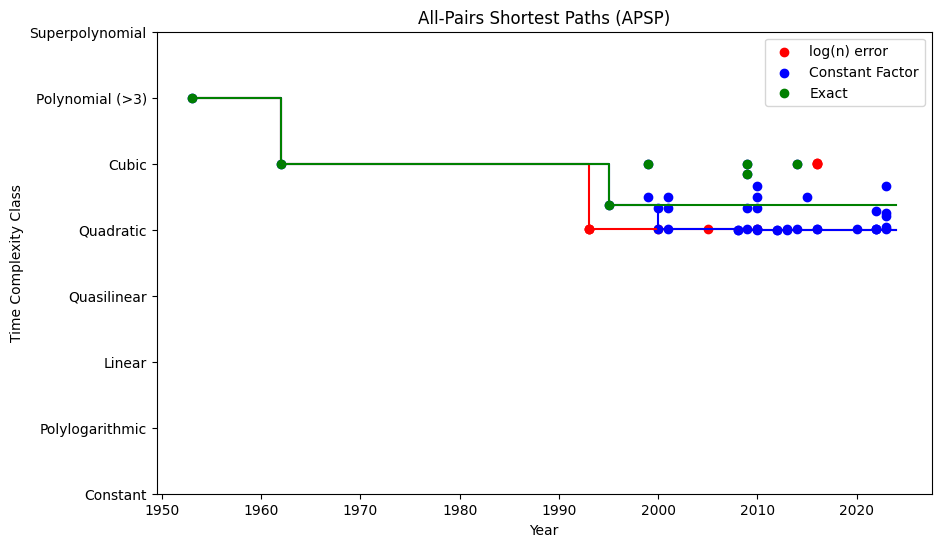

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


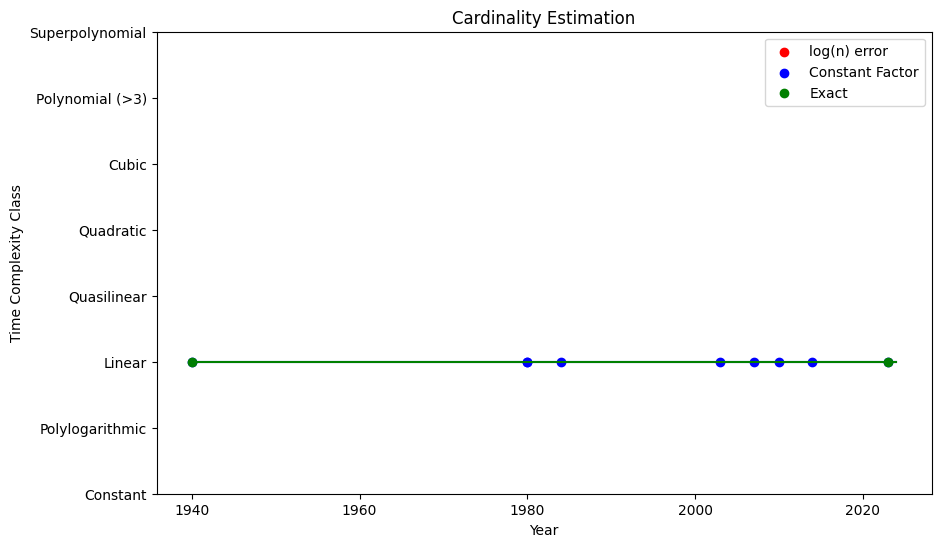

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


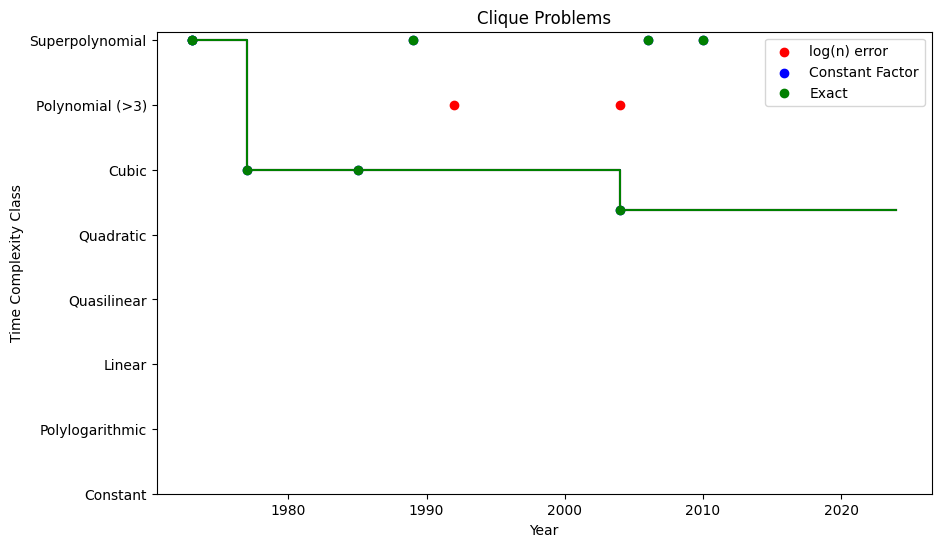

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


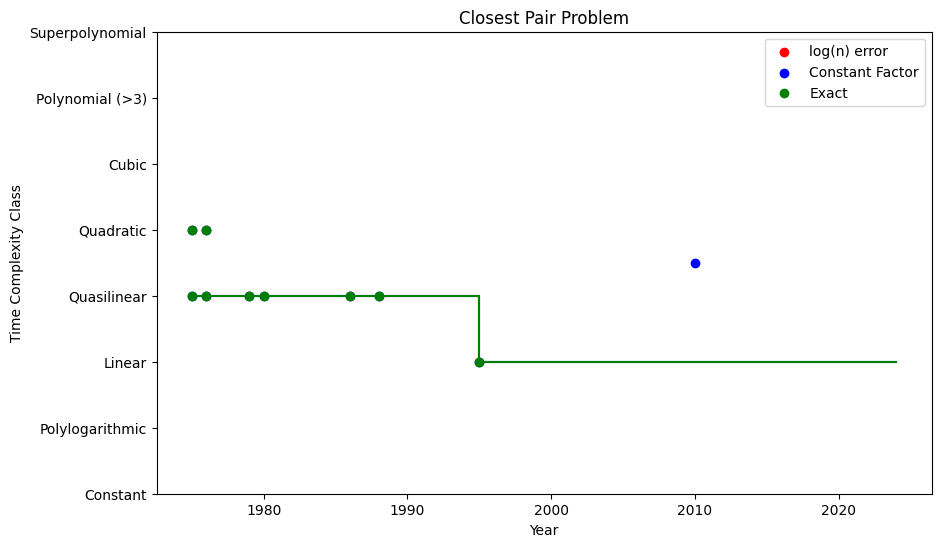

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


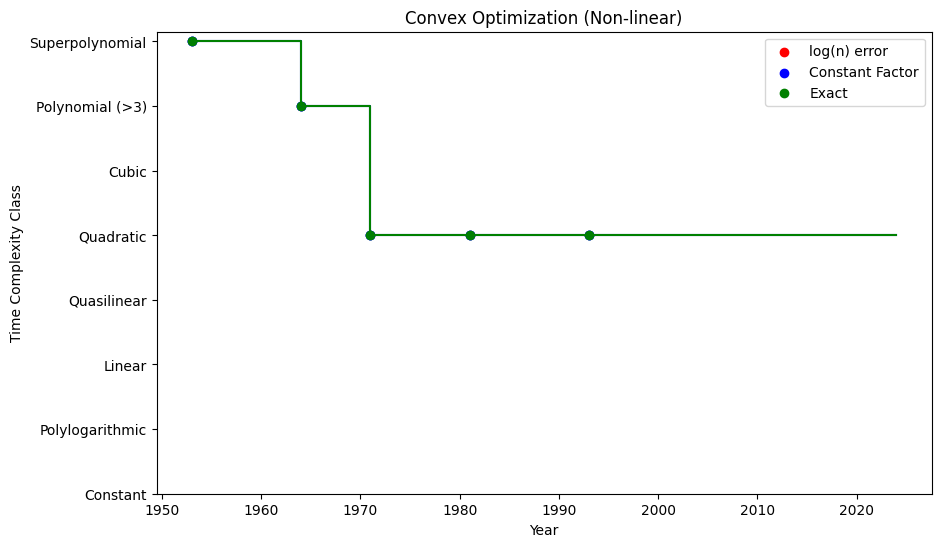

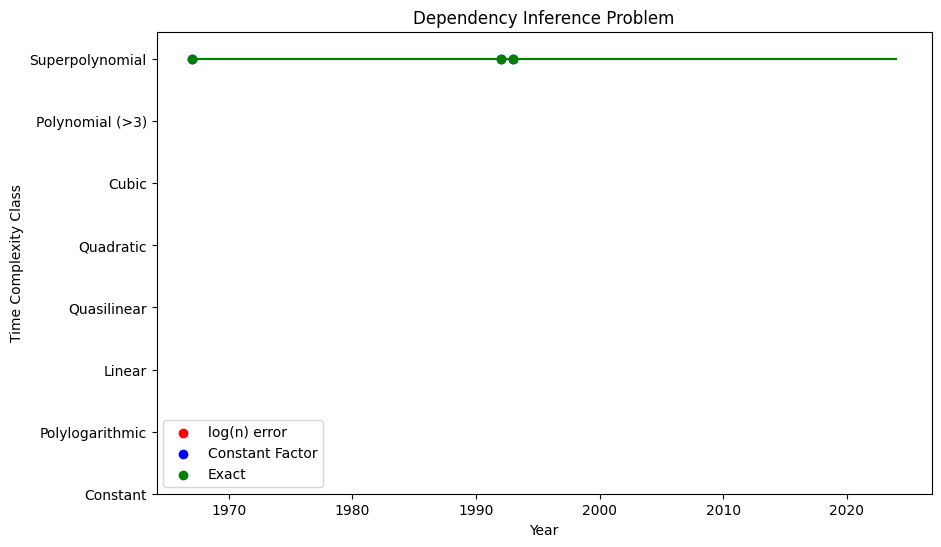

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


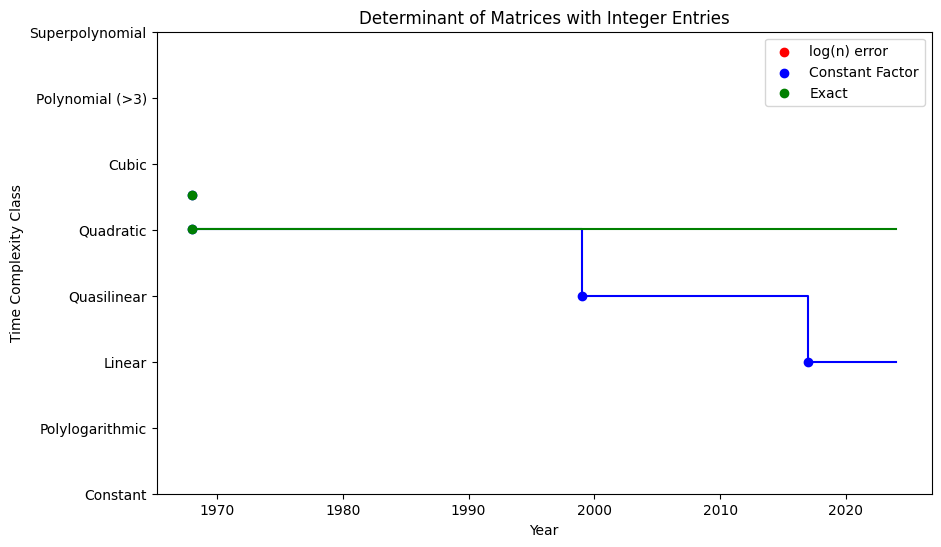

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


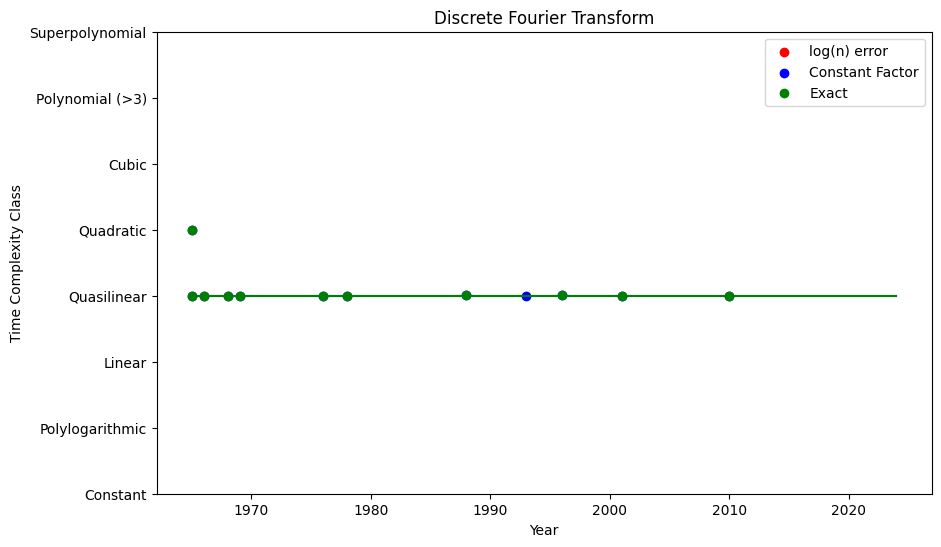

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


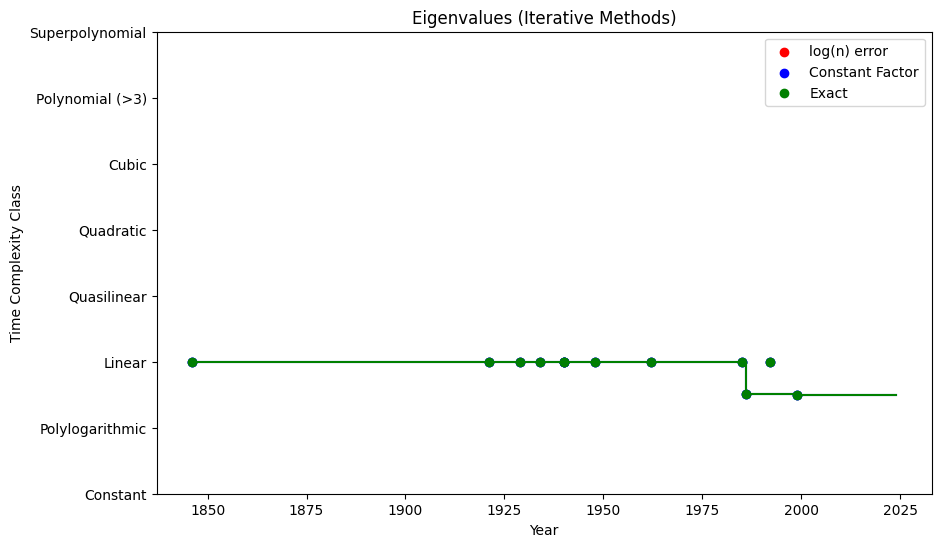

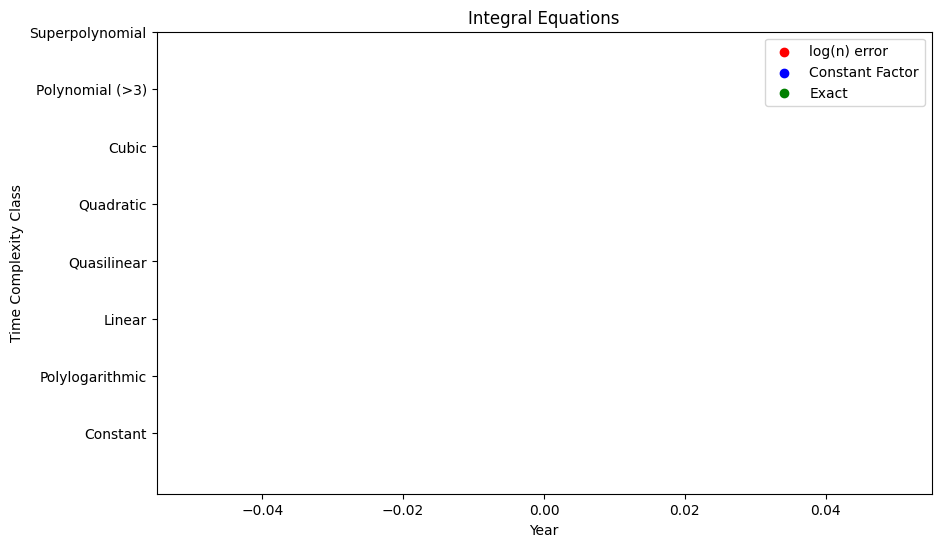

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


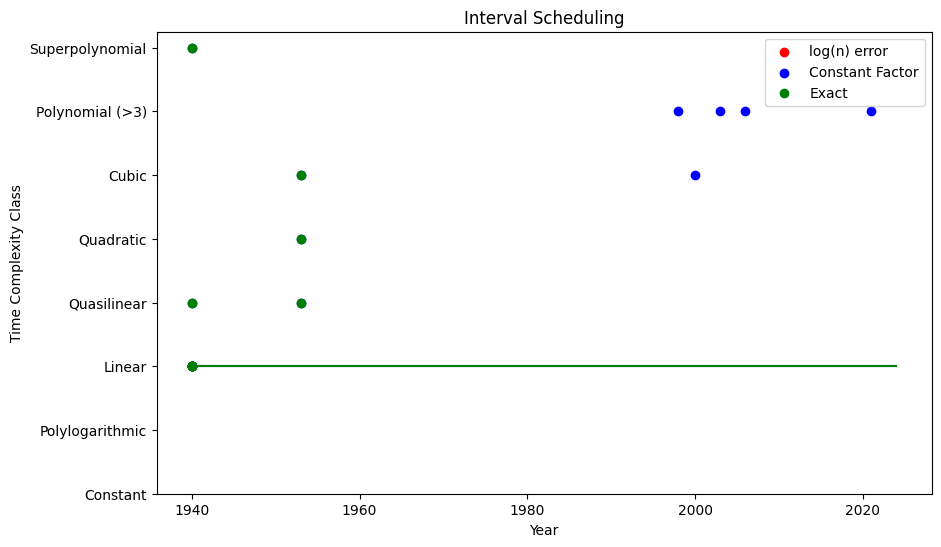

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


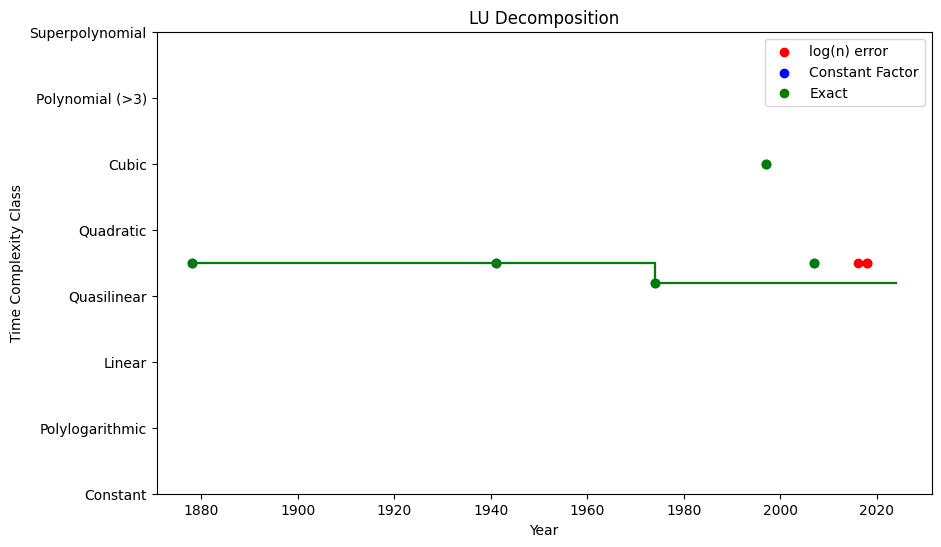

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


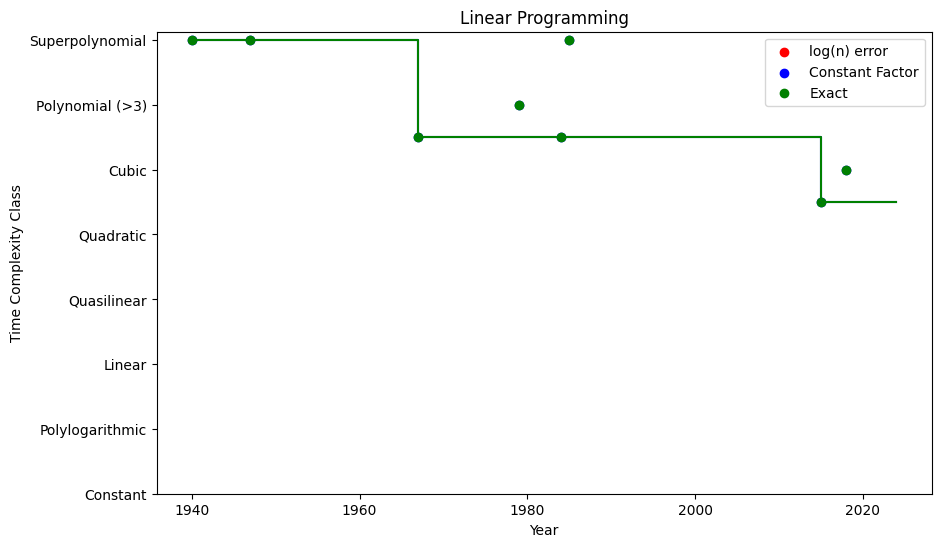

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


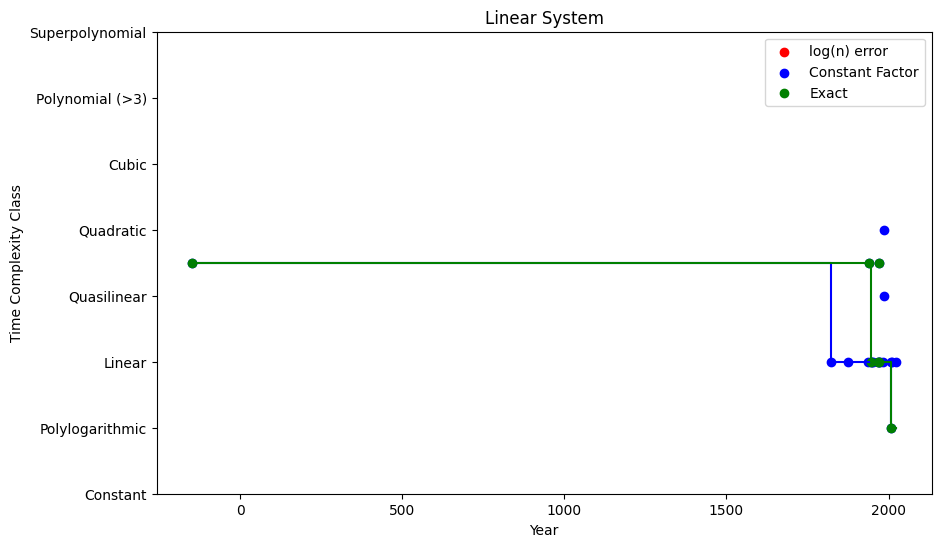

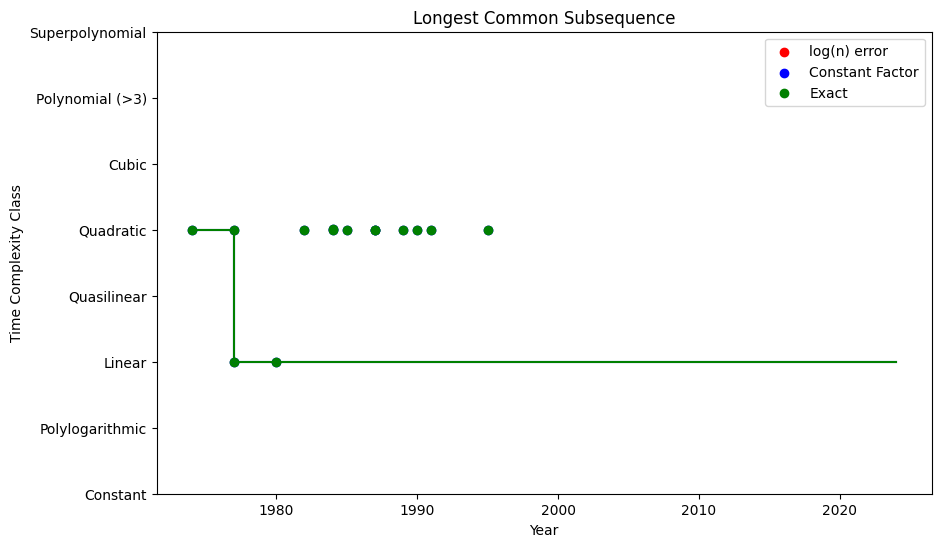

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


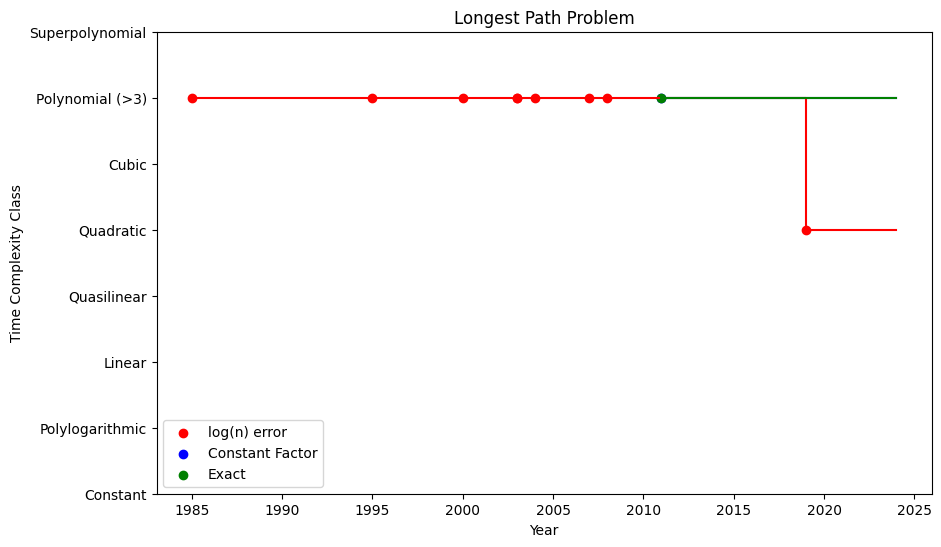

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


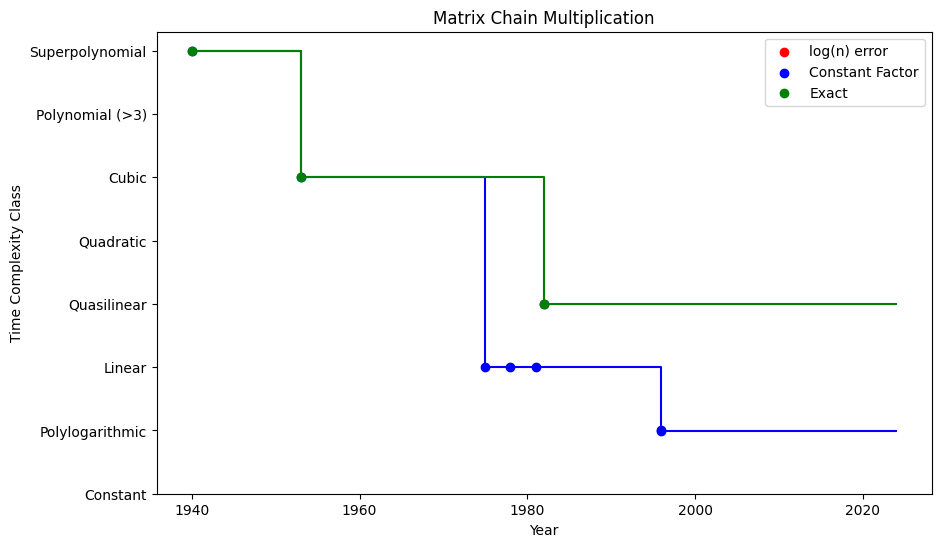

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


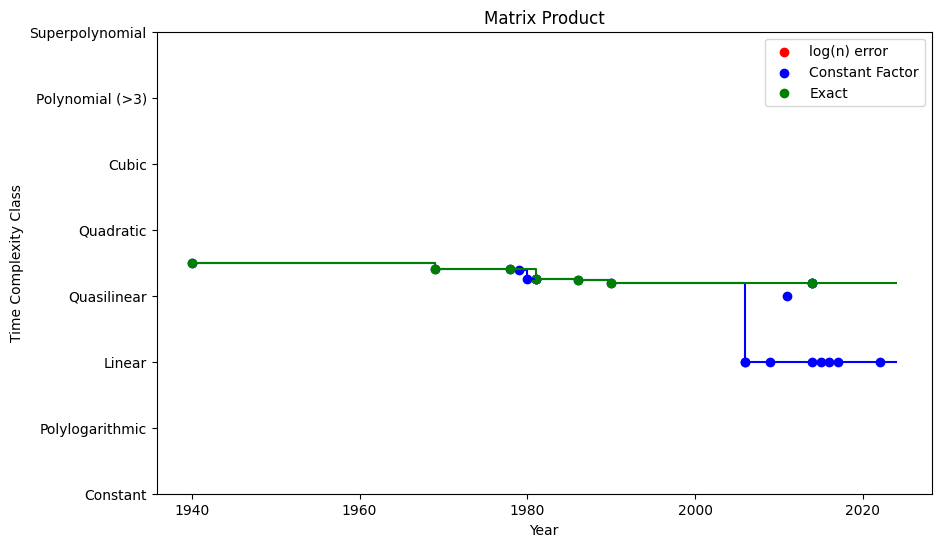

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


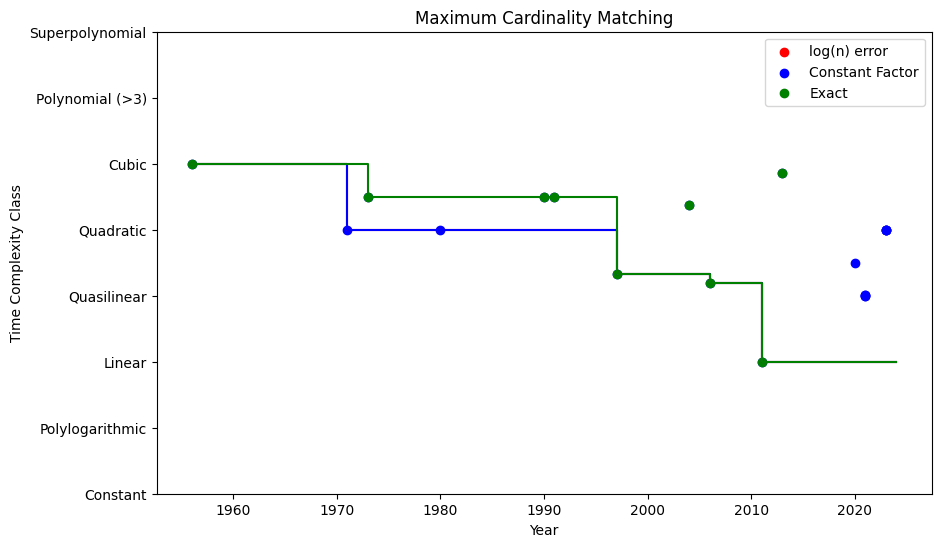

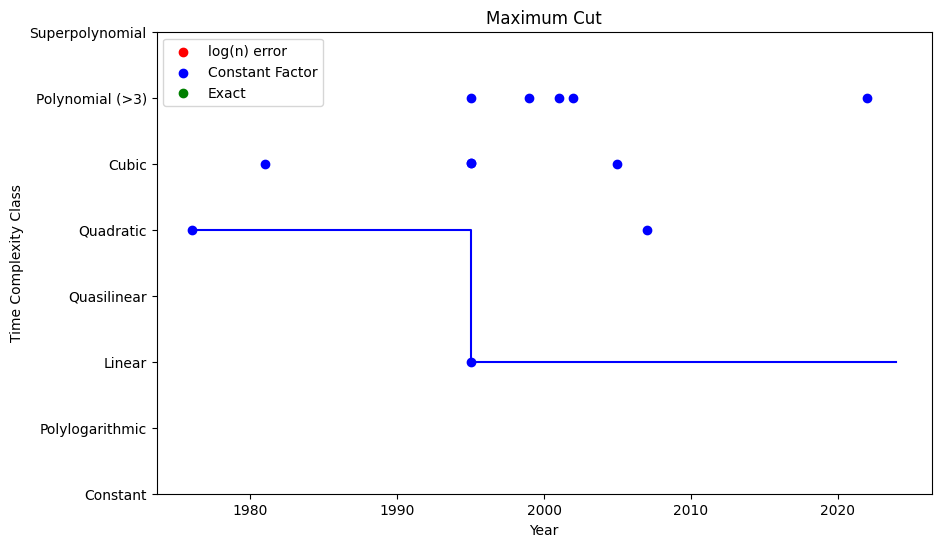

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


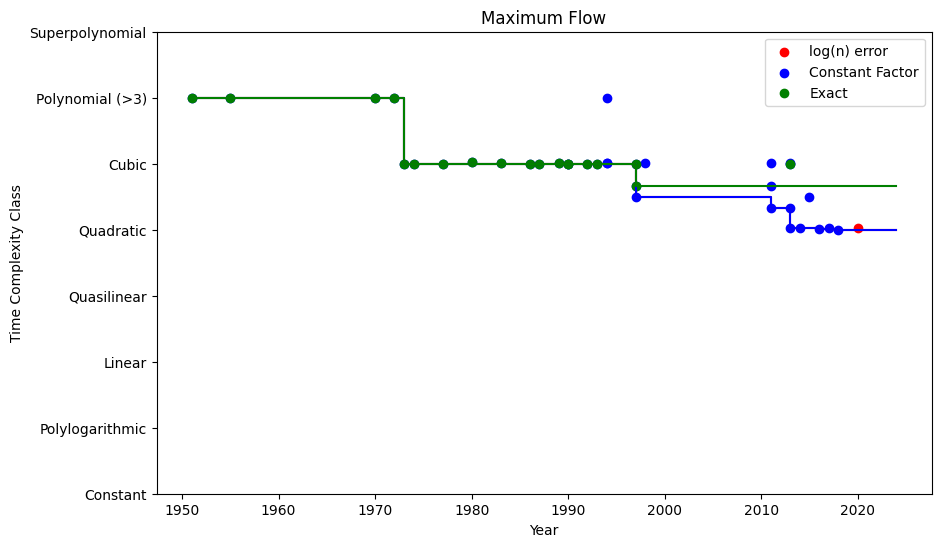

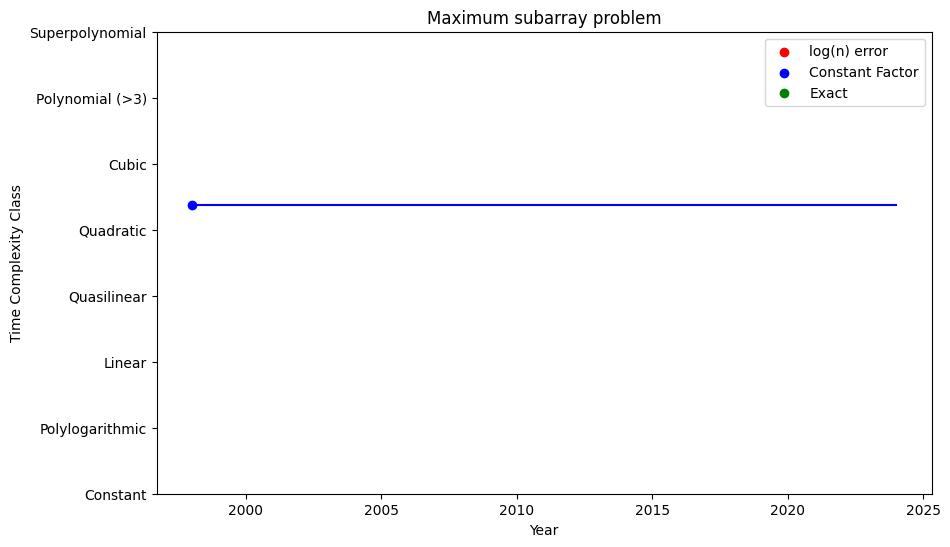

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


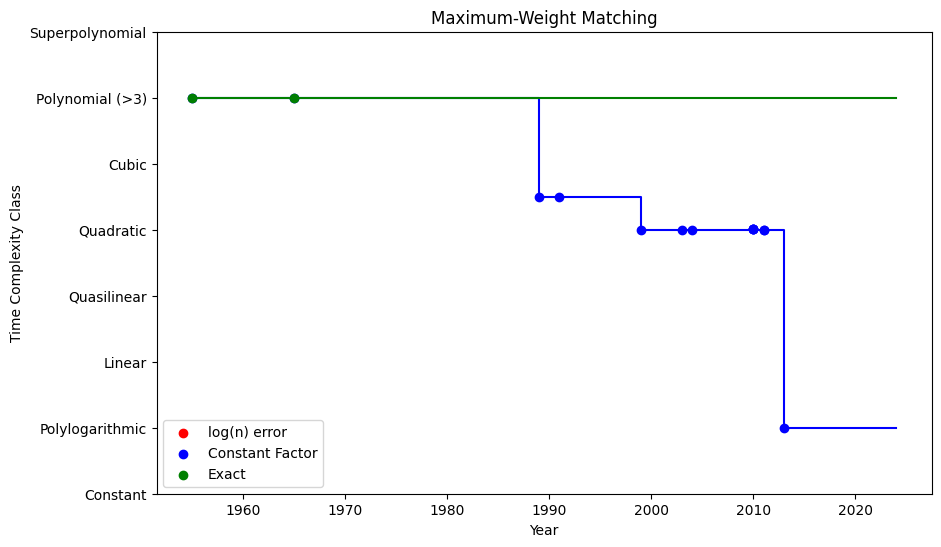

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


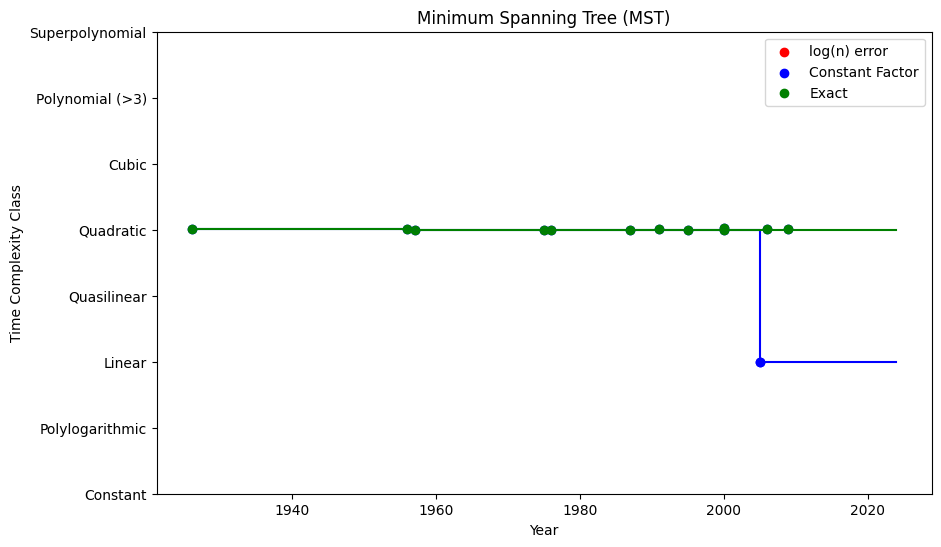

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


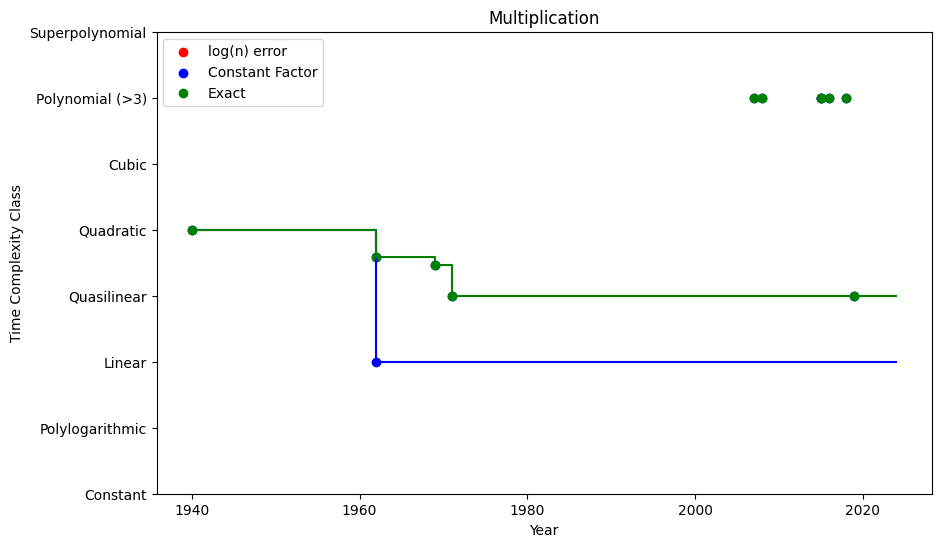

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


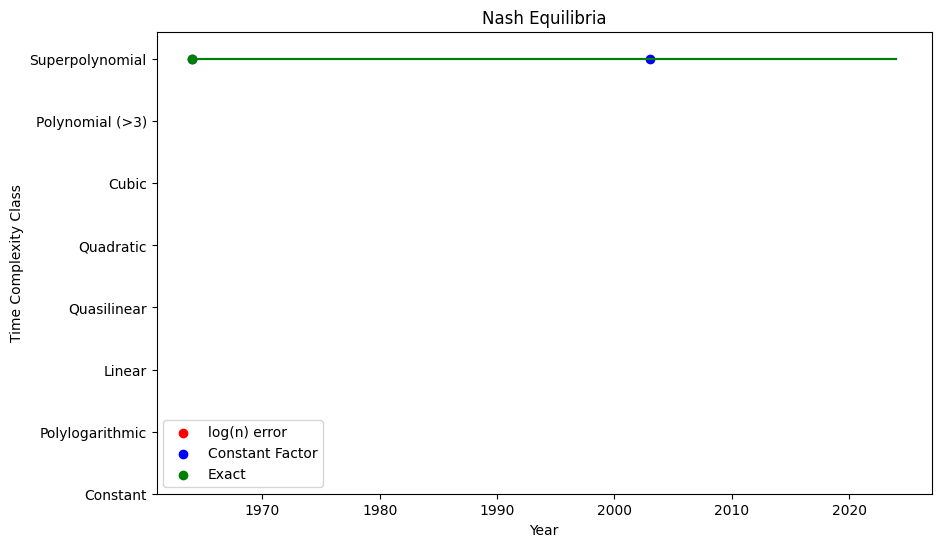

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


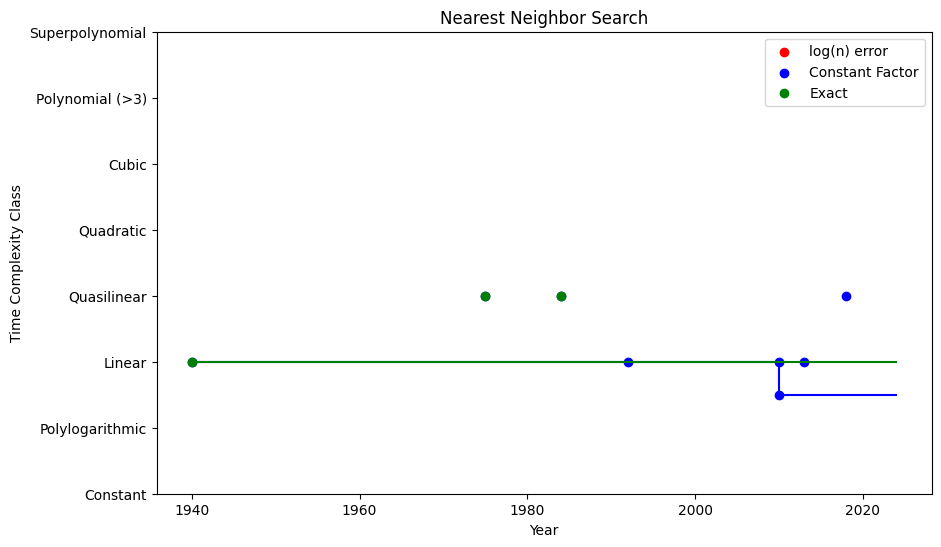

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


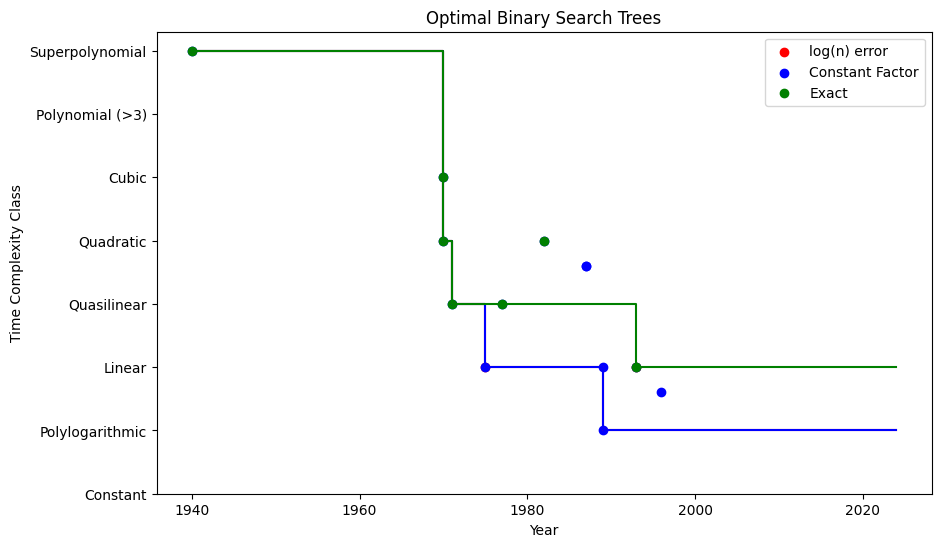

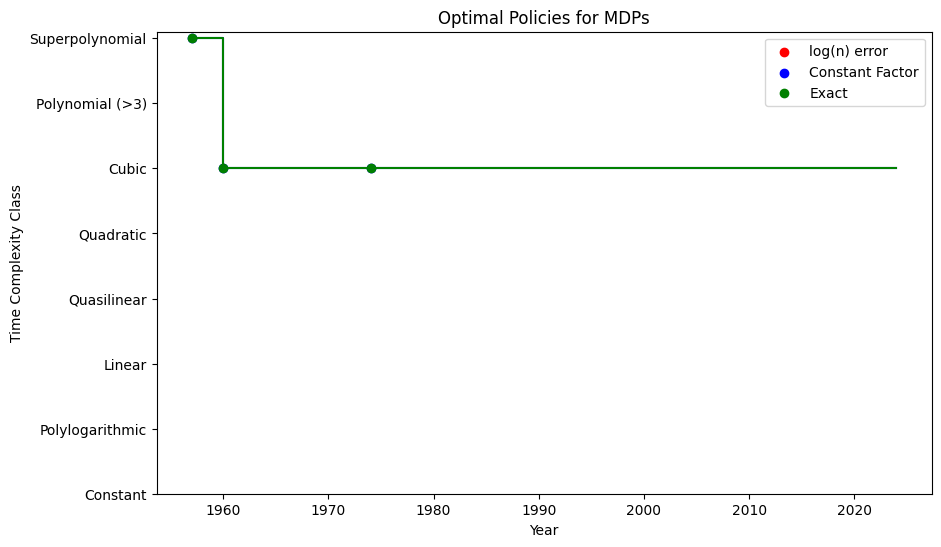

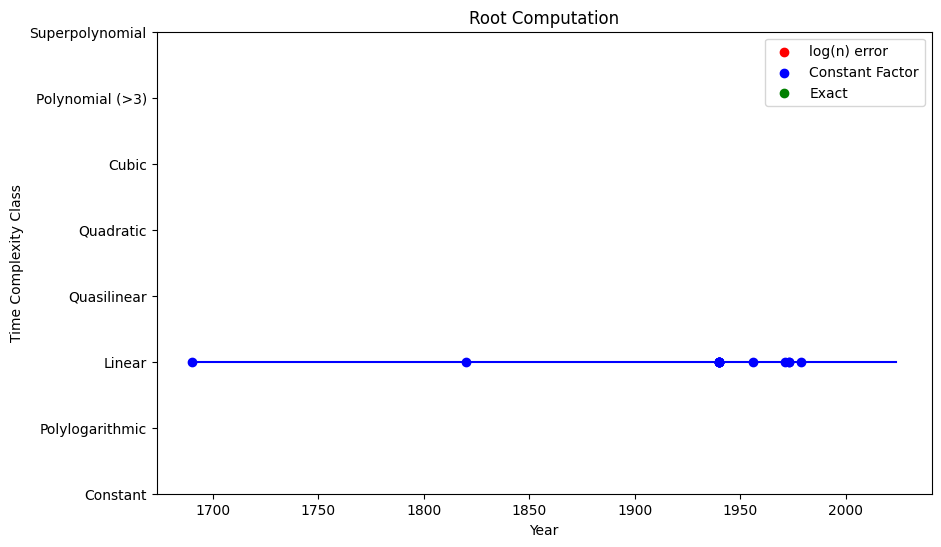

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


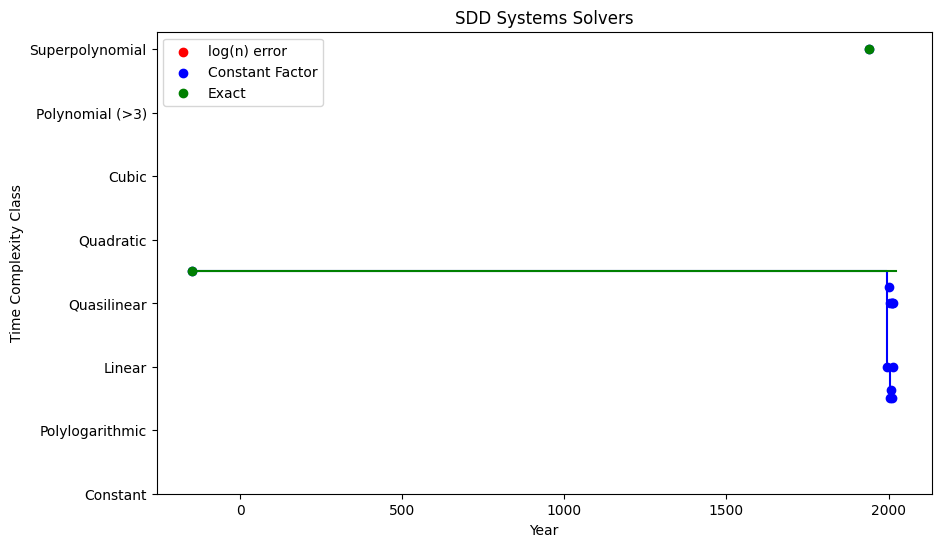

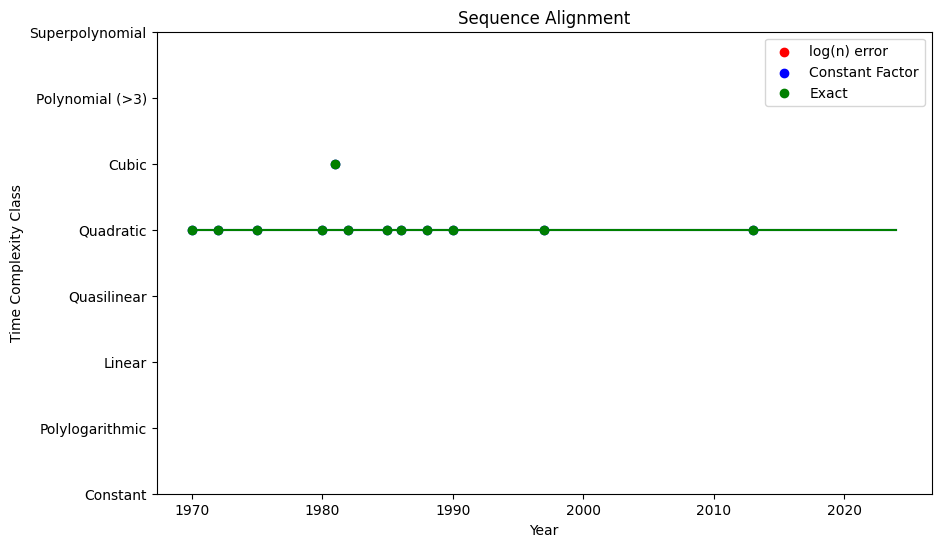

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


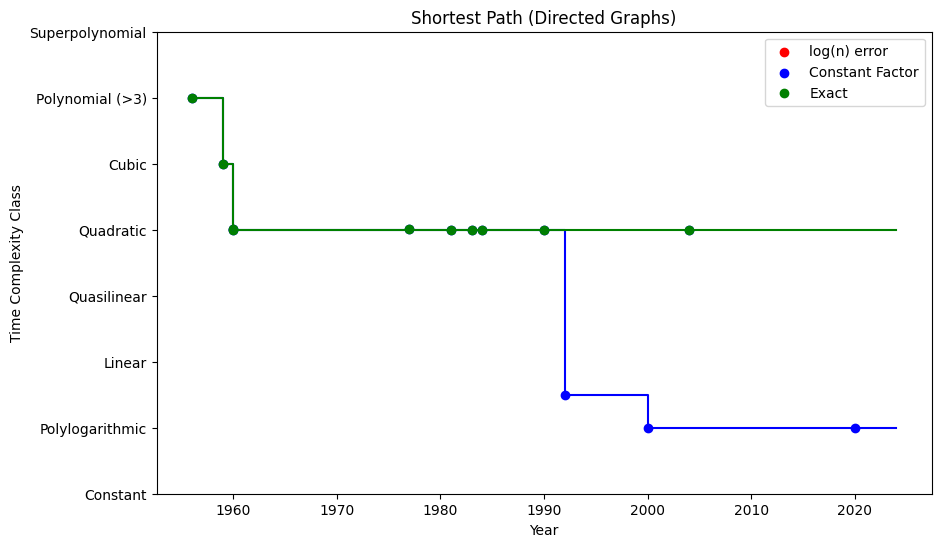

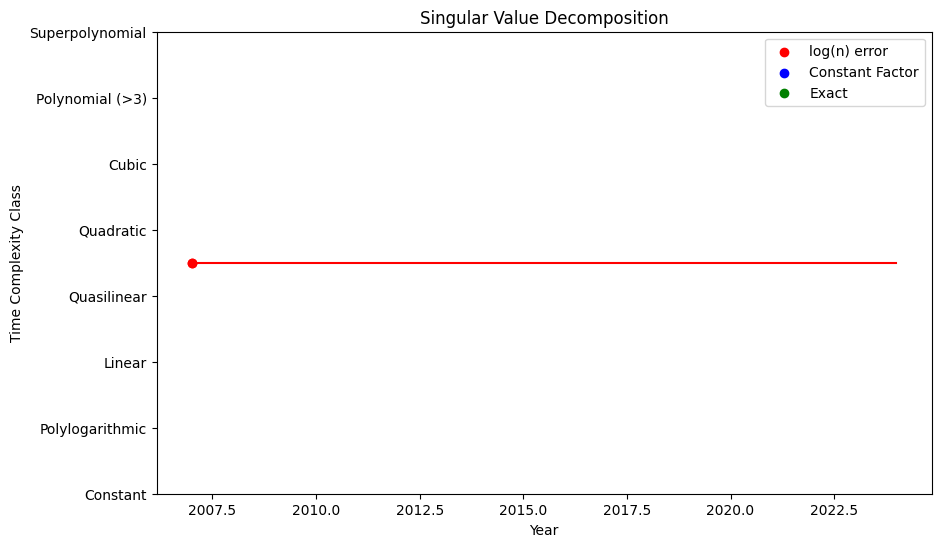

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


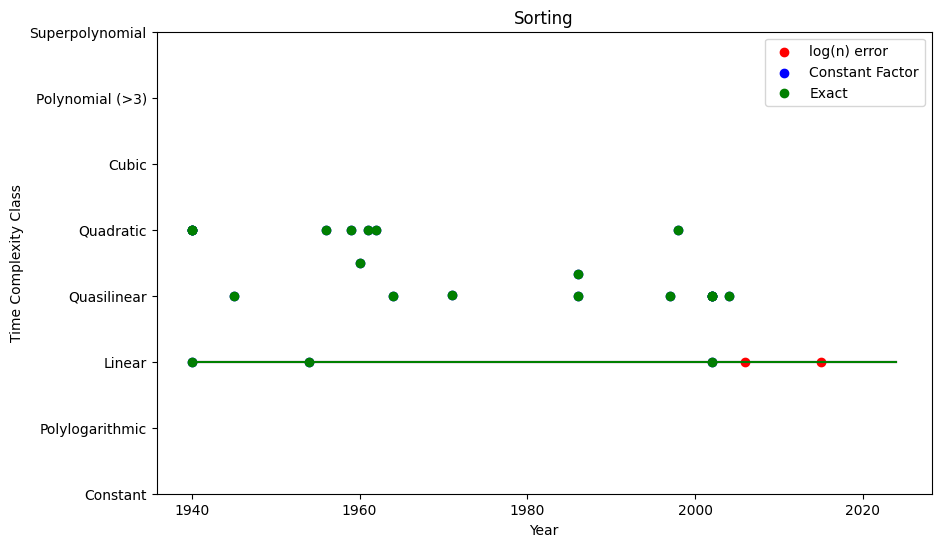

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


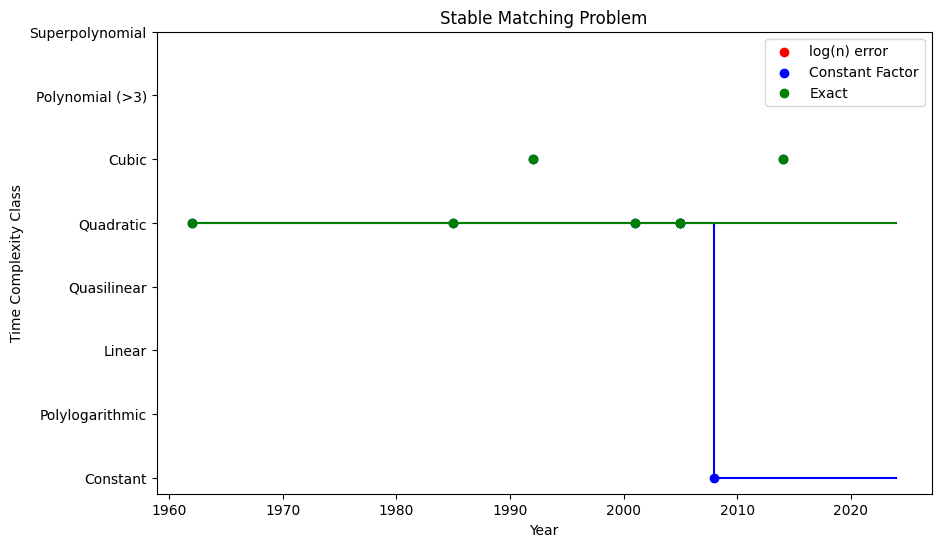

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


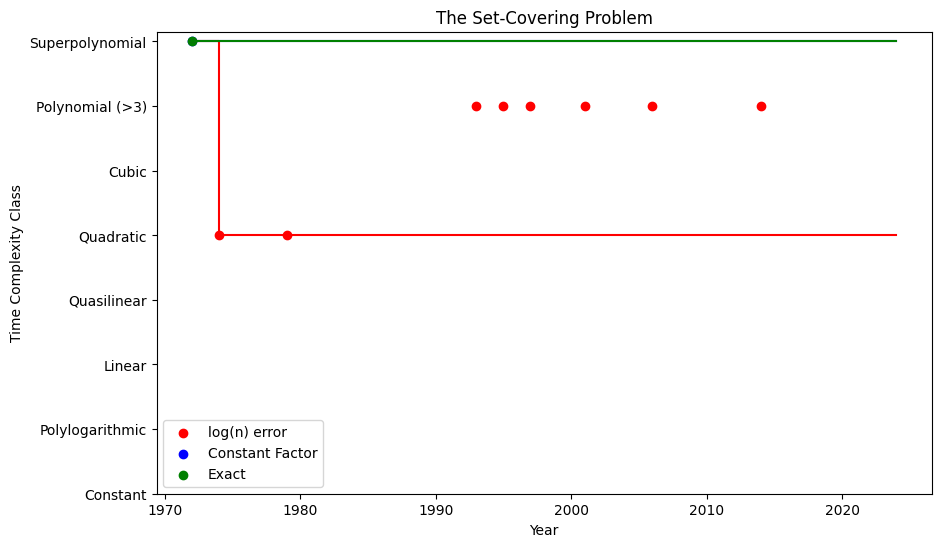

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


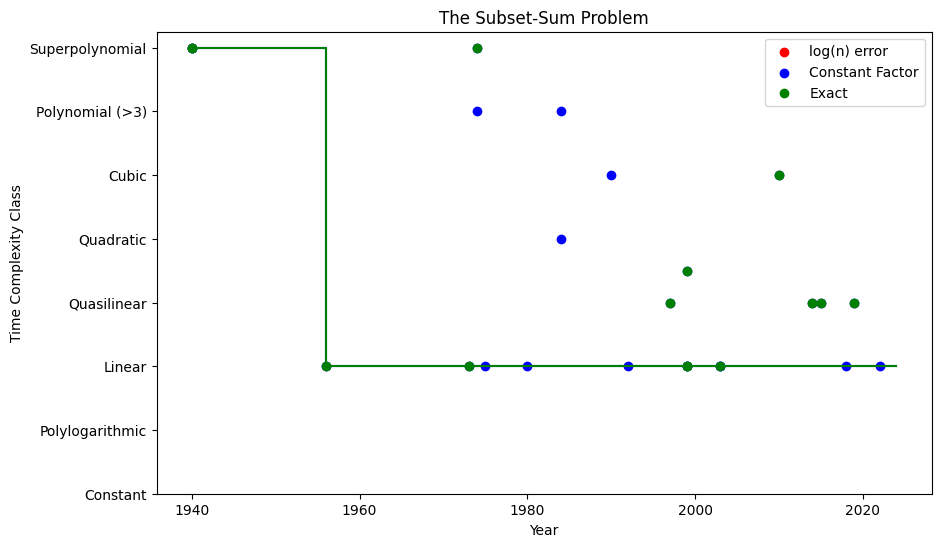

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


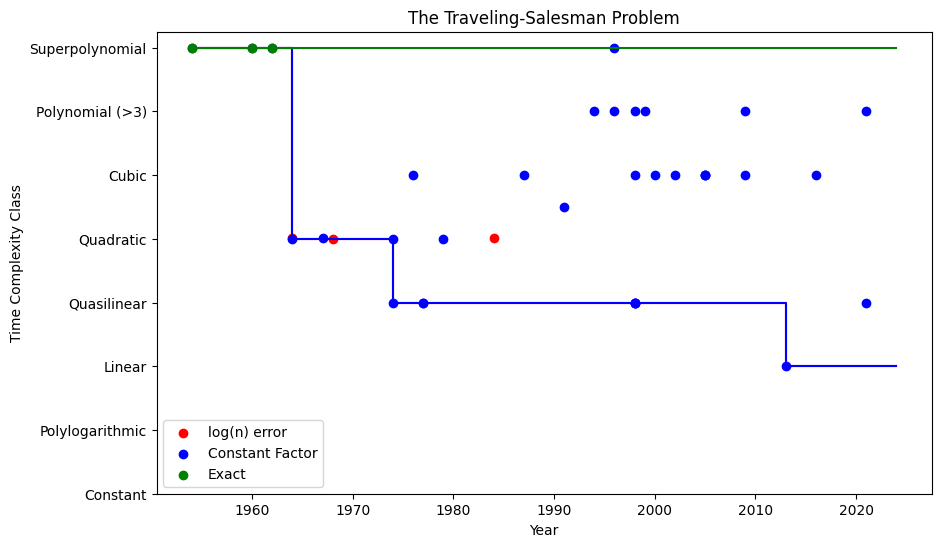

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


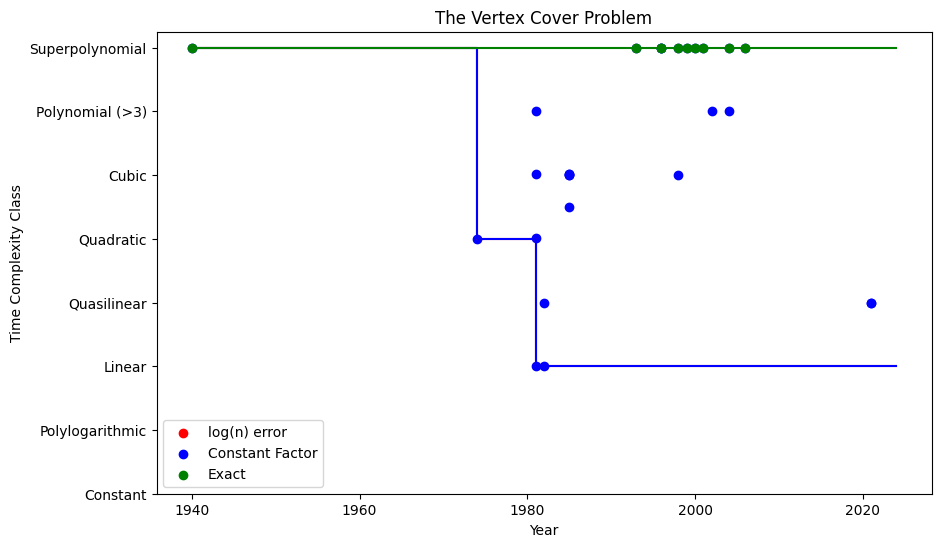

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_82716/260142863.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


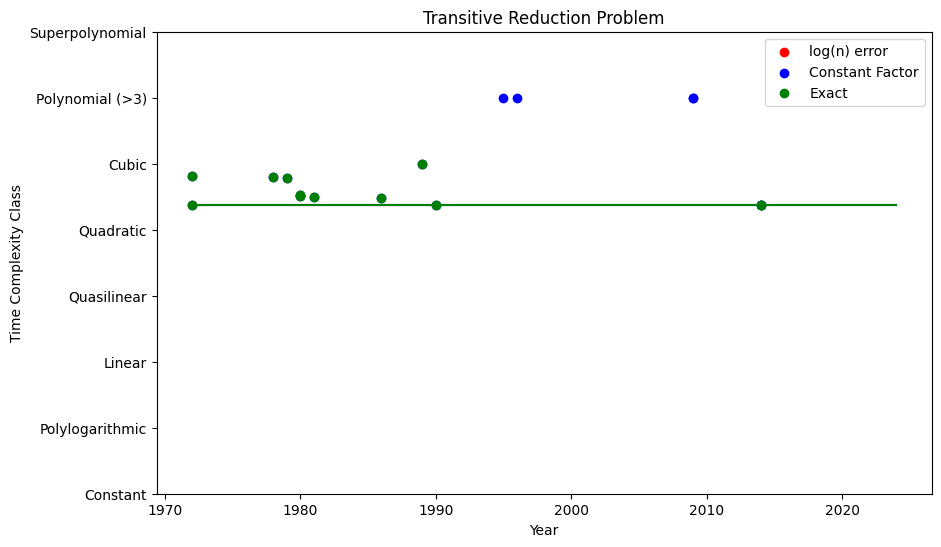

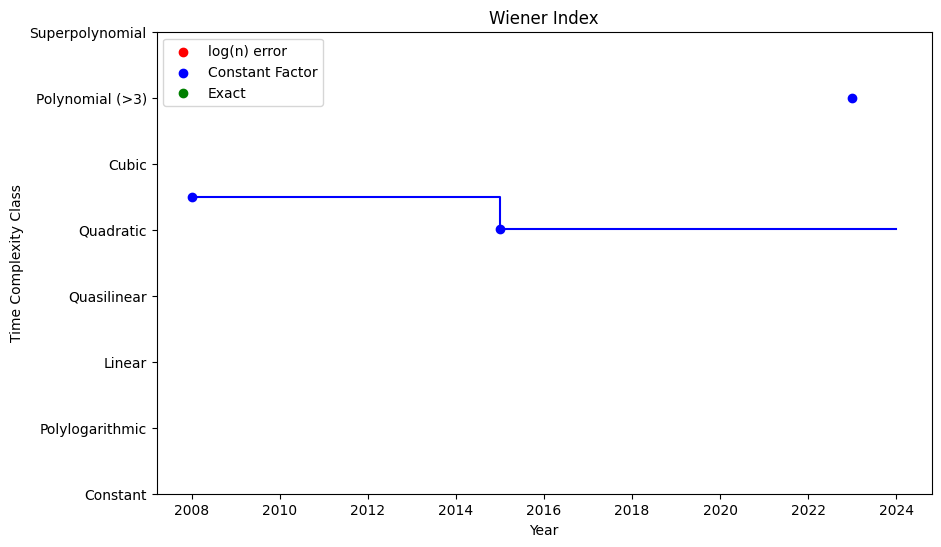

In [74]:
for family in approximation_algorithms['Family Name'].unique():
    plot_family(family)
